In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
import innomatics

In [3]:
df= pd.read_csv('F://bank.csv', delimiter=';')  # or use sep=';'

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


no     4000
yes     521
Name: y, dtype: int64

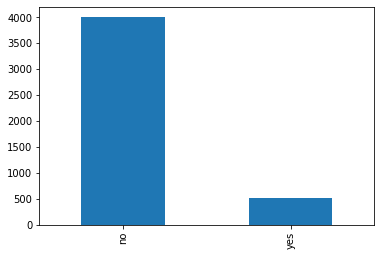

In [5]:
#checking balanced or imbalanced:
#it is imbalanced dataset bcoz there is bais nature in Y/N:---> there are 4000N and 521Y

df['y'].value_counts().plot('bar')
df['y'].value_counts()

In [6]:
#synthetic minority technique:

In [7]:
X= df.iloc[:,:-1] #ind
Y= df.iloc[:,-1] #dep

In [8]:
Y.replace(['no','yes'],[0,1],inplace=True)  # replacing categorical data to numerical

In [9]:
# create dummies

In [10]:
Xf= pd.get_dummies(X,drop_first=True)

In [11]:
Xf.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [12]:
np.random.seed(1001)
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test= train_test_split(Xf,Y,test_size=0.2)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3616, 42), (905, 42), (3616,), (905,))

### Classification Algorithm:

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
model= KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)   # by default p=2:

In [16]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Evaluation:

In [17]:
y_pred= model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:,1]   # considering prob  

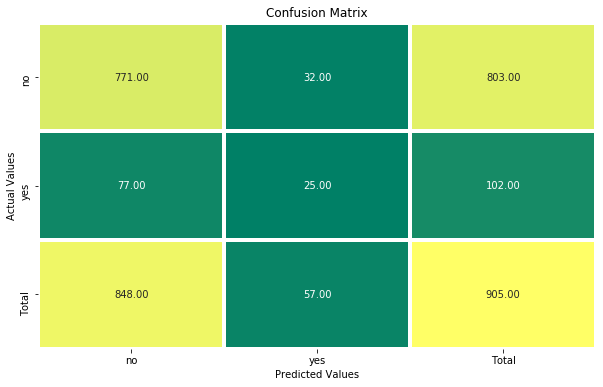

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.91      0.96      0.93       803
           1       0.44      0.25      0.31       102

    accuracy                           0.88       905
   macro avg       0.67      0.60      0.62       905
weighted avg       0.86      0.88      0.86       905


************************************Kappa Score************************************


Kappa Score = 0.25419794808984864

******************************Area Under Curve Score******************************


AUC Score = 0.6026237394085903
Number of probabilities to build ROC = 7


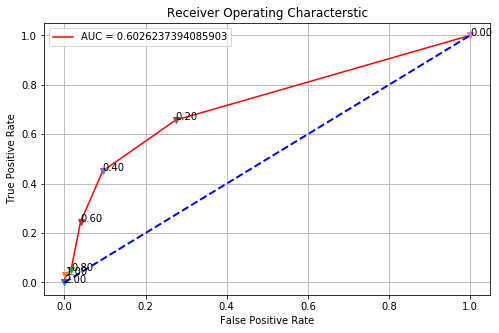

In [18]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob,['no','yes'],n=1,verbose=True)

#### for the above graph and models are explained in Notes

In [19]:
# solution for imbalanced dataset:
# mostly SYNTHETIC MINORUTY OVERSAMPLING TECHNIQUE is used

- pip install imbalanced_learn
- pip install tensorflow

In [20]:
import imblearn
from imblearn.over_sampling import SMOTE

In [21]:
x_resample,y_resample = SMOTE(k_neighbors=5).fit_resample(Xf,Y)

#save this data
#as the data is in arrays....-->        np.savez('bank_oversample.npz',x_resample,y_resample)


# loading the dataset which is saved----> data_over = np.load('bank_oversample.npz')
# data_over.files


# y_over = data_over['arr_0']
# x_over = data_over['arr_1']

1    4000
0    4000
dtype: int64

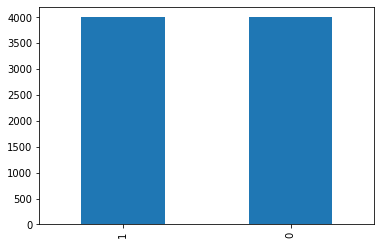

In [22]:
pd.Series(y_resample).value_counts().plot('bar')
pd.Series(y_resample).value_counts()

In [23]:
# train and test with resample data:

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test= train_test_split(x_resample,y_resample,test_size=0.2)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6400, 42), (1600, 42), (6400,), (1600,))

In [26]:
#classification Algorithm:

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model_over= KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)   # by default p=2:

In [29]:
model_over.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
# Evaluation

In [31]:
y_pred= model_over.predict(x_test)
y_pred_prob = model_over.predict_proba(x_test)[:,1]   # considering prob  

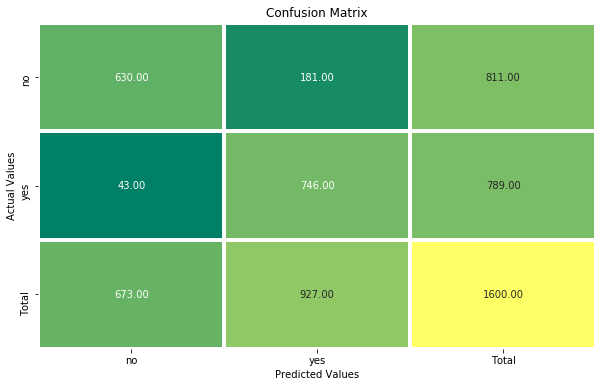

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.94      0.78      0.85       811
           1       0.80      0.95      0.87       789

    accuracy                           0.86      1600
   macro avg       0.87      0.86      0.86      1600
weighted avg       0.87      0.86      0.86      1600


************************************Kappa Score************************************


Kappa Score = 0.7206098562980494

******************************Area Under Curve Score******************************


AUC Score = 0.8611596880035133
Number of probabilities to build ROC = 7


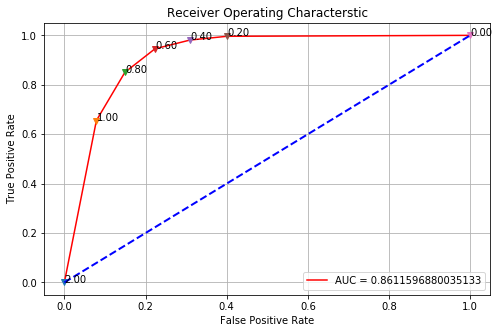

In [32]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob,['no','yes'],n=1,verbose=True)

#### What could be real time accuracy:

###  K-Fold:

In [37]:
np.random.seed(101)
from sklearn.model_selection import KFold

In [43]:
kfold= KFold(n_splits=5, shuffle=False)

In [51]:
cross_validation=[]
for train_index, test_index in kfold.split(x_train):
    print('TRAIN:',train_index,'TEST:',test_index)
    x_train_kf,x_test_kf = x_train[train_index],x_train[test_index]
    y_train_kf,y_test_kf = y_train[train_index],y_train[test_index]
    #building model
    model_cv = KNeighborsClassifier(n_neighbors=5)
    model_cv.fit(x_train_kf,y_train_kf)
    #taking accuracy
    acc= model_cv.score(x_test_kf,y_test_kf)
    cross_validation.append(acc*100)# to %

TRAIN: [1280 1281 1282 ... 6397 6398 6399] TEST: [   0    1    2 ... 1277 1278 1279]
TRAIN: [   0    1    2 ... 6397 6398 6399] TEST: [1280 1281 1282 ... 2557 2558 2559]
TRAIN: [   0    1    2 ... 6397 6398 6399] TEST: [2560 2561 2562 ... 3837 3838 3839]
TRAIN: [   0    1    2 ... 6397 6398 6399] TEST: [3840 3841 3842 ... 5117 5118 5119]
TRAIN: [   0    1    2 ... 5117 5118 5119] TEST: [5120 5121 5122 ... 6397 6398 6399]


In [52]:
cross_validation

[83.75, 83.59375, 83.671875, 85.15625, 84.296875]

In [56]:
np.mean(cross_validation), pd.Series(cross_validation).var()

(84.09375, 0.4290771484375)

### Bais variance Trade off

In [57]:
train_acc=[]
test_acc=[]
for i in range(1,10):
    model_b = KNeighborsClassifier(n_neighbors=i,metric='canberra')
    model_b.fit(x_train,y_train)
    tracc= model_b.score(x_train,y_train)
    teacc= model_b.score(x_test,y_test)
    train_acc.append(tracc)
    test_acc.append(teacc)

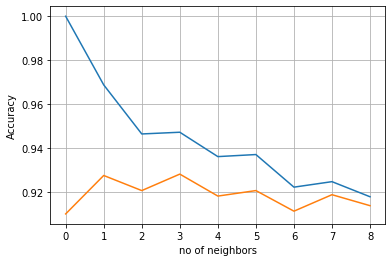

In [58]:
plt.plot(train_acc)
plt.plot(test_acc)
plt.xlabel('no of neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

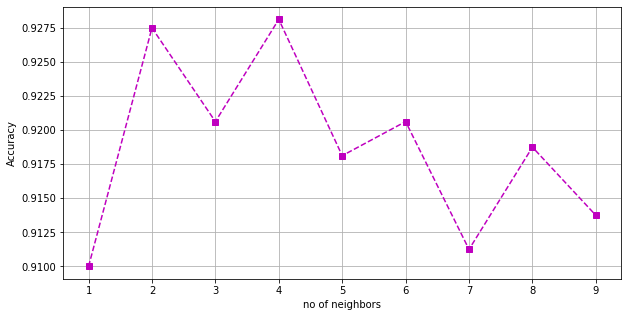

In [59]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,10),test_acc,'ms--')
plt.xlabel('no of neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

### GridSearch CV:

In [60]:
np.random.seed(101)
from sklearn.model_selection import GridSearchCV

In [61]:
tuning_parameter = [{'n_neighbors': range(3,20,2),
                    'metric':['canberra','euclidean','minkowski']}]

In [62]:
#configuring grid search
clf= GridSearchCV(KNeighborsClassifier(),
                 tuning_parameter,cv=5,scoring='accuracy')

In [63]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(3, 20, 2)}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)